In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")




In [12]:

# Display basic info
print("Customers Data Info:")
print(customers.info())
print("\nProducts Data Info:")
print(products.info())
print("\nTransactions Data Info:")
print(transactions.info())


Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

In [13]:

# Check for missing values
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())




Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [14]:
# Merge datasets
data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


<ipython-input-15-5b50c7d1a9cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


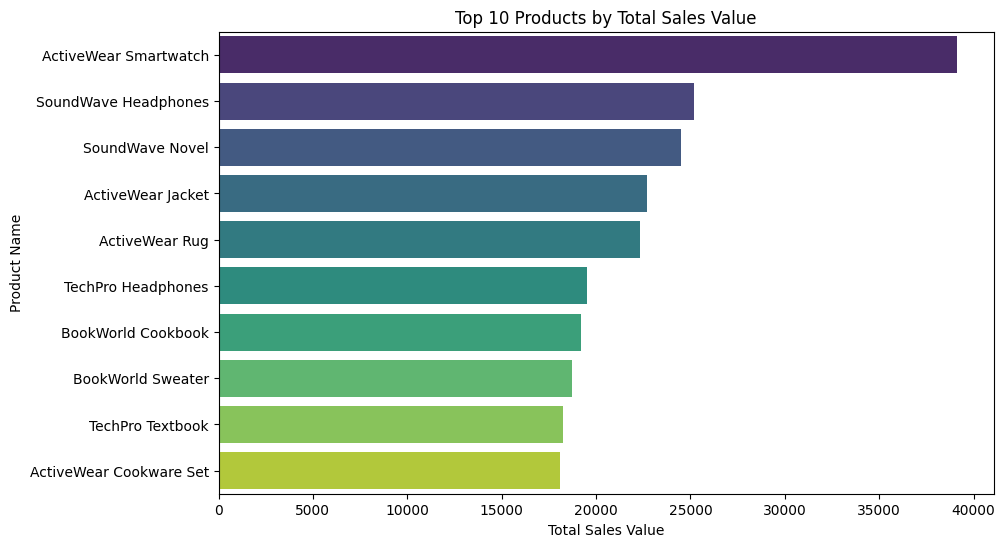

In [15]:

# EDA and Visualizations
# 1. Top 10 Products by Total Sales Value
top_products = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Total Sales Value")
plt.xlabel("Total Sales Value")
plt.ylabel("Product Name")
plt.show()

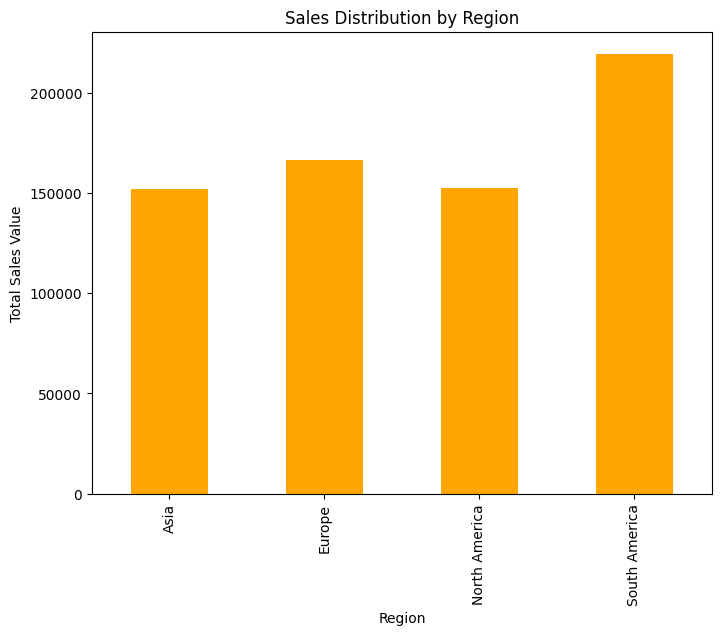

In [16]:

# 2. Sales Distribution by Region
region_sales = data.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', color='orange')
plt.title("Sales Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Value")
plt.show()

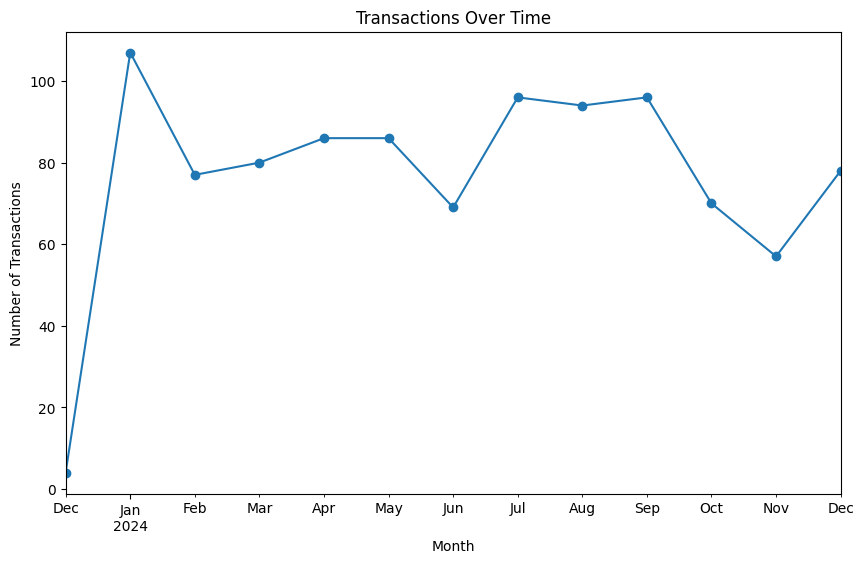

In [17]:


# 3. Trend of Transactions Over Time
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
transactions_over_time = data.groupby(data['TransactionDate'].dt.to_period("M"))['TransactionID'].count()
transactions_over_time.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Transactions Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()



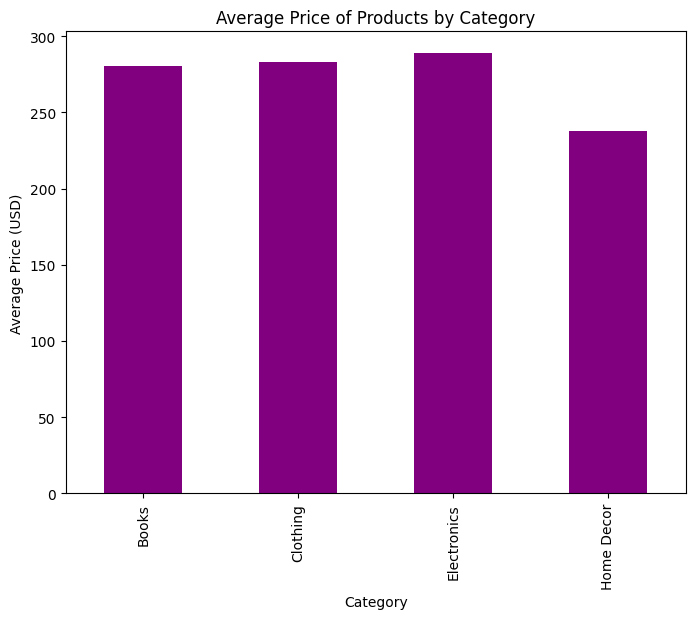

In [18]:
# 4. Average Price of Products by Category
category_avg_price = data.groupby('Category')['Price_y'].mean()
category_avg_price.plot(kind='bar', color='purple', figsize=(8, 6))
plt.title("Average Price of Products by Category")
plt.xlabel("Category")
plt.ylabel("Average Price (USD)")
plt.show()


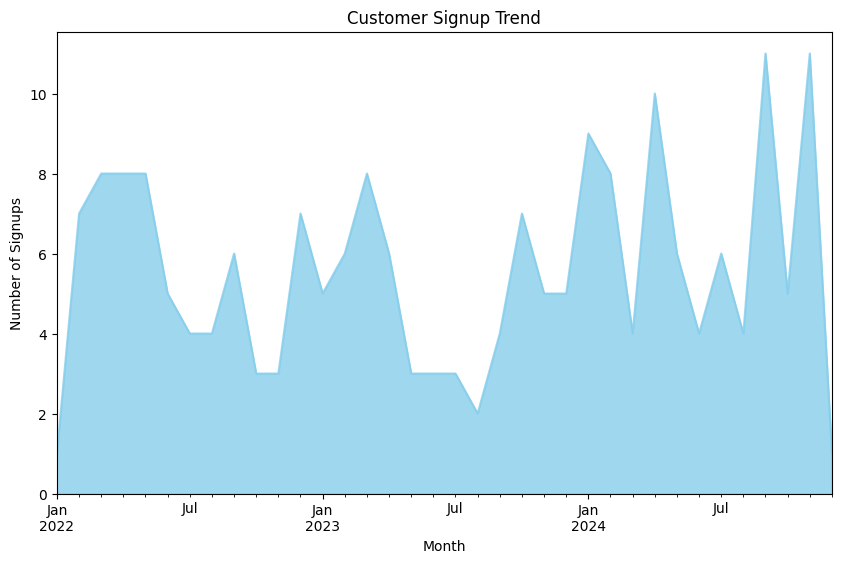

In [19]:

# 5. Customer Signup Distribution
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trend = customers.groupby(customers['SignupDate'].dt.to_period("M"))['CustomerID'].count()
signup_trend.plot(kind='area', color='skyblue', figsize=(10, 6), alpha=0.8)
plt.title("Customer Signup Trend")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.show()
